# F0AM barcharts with by sector and by precursor on one plot

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## F0AM result files

In [3]:
sectors_rename = {
    'ptwildfire':       'wildfires',
    'ptrxfire':         'Rx fires',
    'onroad_gasoline':  'onroad gas',
    'ptnonipm':         'non-EGU point',
    'nonroad_gasoline': 'nonroad gas',
    'onroad_diesel':    'onroad diesel',
    'ptfire_grass':     'grass fires',
    'np_oilgas':        'O&G nonpt',
    'nonroad_diesel':   'nonroad diesel',
    'pt_oilgas':        'O&G point',
    'ptagfire':         'ag fires',
    'ptegu':            'EGUs',
}

In [4]:
workdir = './'
data_dir = f'{workdir}/data/f0am'
ox_case = 'OH1e6_only'
# secondary HCHO by sector
hcho_bysector = pd.read_csv(f'{data_dir}/ending_HCHO_conc_bysector_{ox_case}.csv')
hcho_bysector = hcho_bysector.set_index('emis_sectors').rename(sectors_rename, axis='index')
hcho_bysector_nobiog = hcho_bysector.query("emis_sectors != 'biogenics'")
# secondary HCHO by precursor group
hcho_bygroup = pd.read_csv(f'{data_dir}/ending_HCHO_conc_byprecursor_{ox_case}.csv')
hcho_bygroup = hcho_bygroup.set_index('emis_group_names')
hcho_bygroup_biog = pd.read_csv(f'{data_dir}/ending_HCHO_conc_byprecursor_biog_{ox_case}.csv')
hcho_bygroup_biog = hcho_bygroup_biog.set_index('emis_group_names')

## plots

In [5]:
plt.rcParams.update({'font.size': 8})

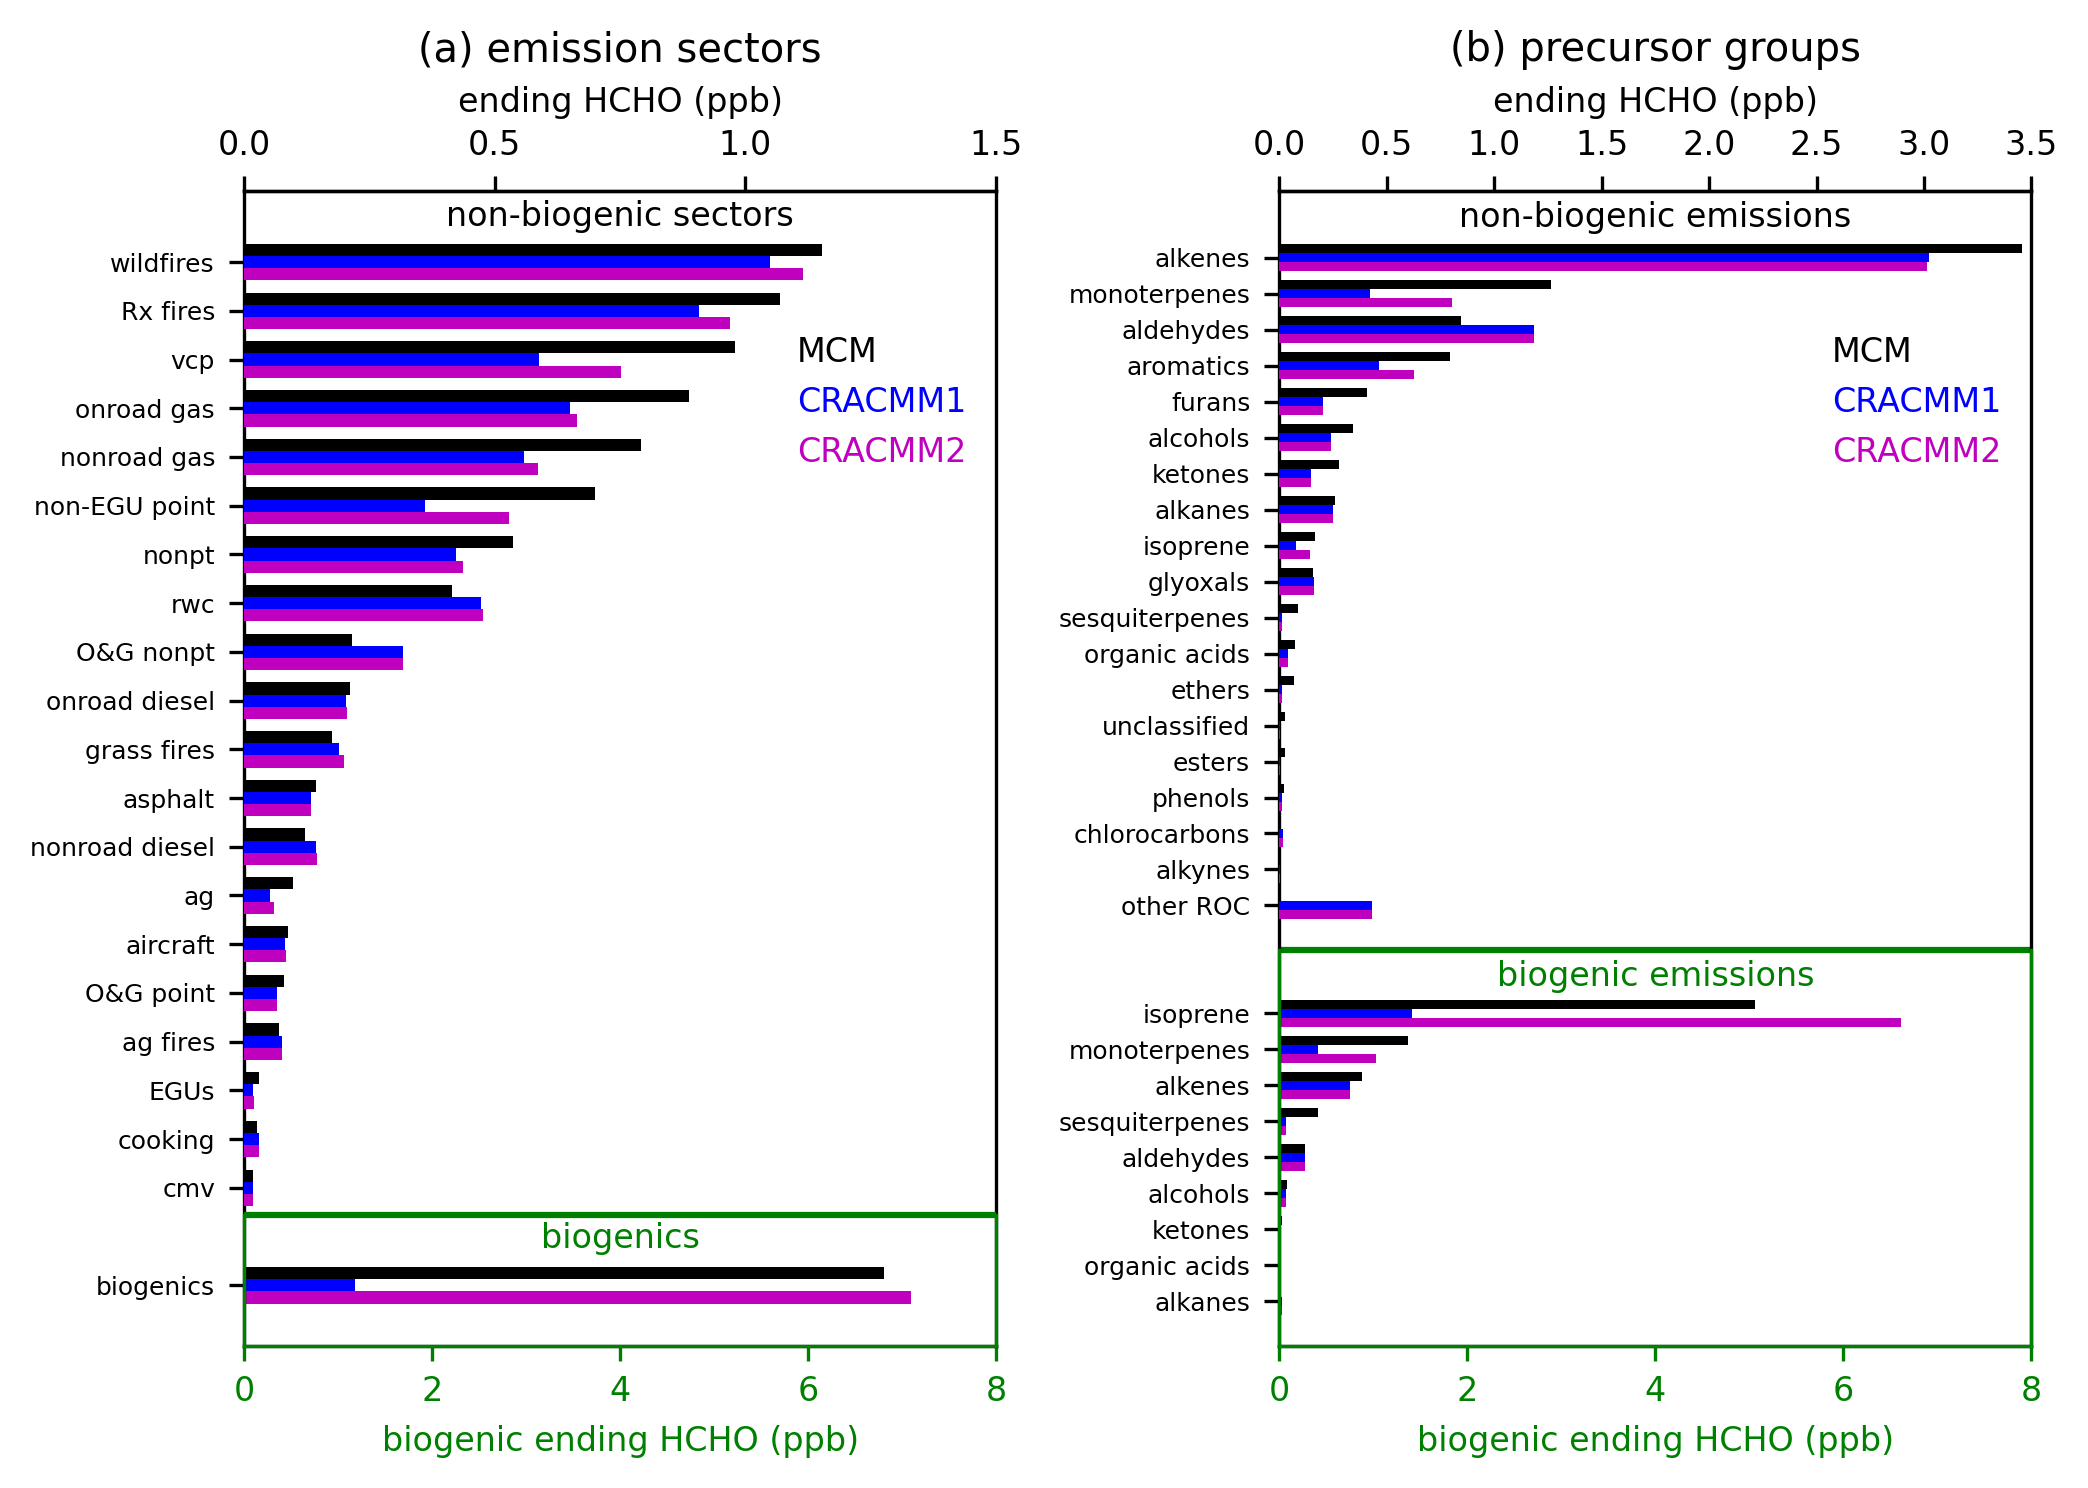

In [6]:
width = 0.25  # width of the bars
labelsize = 6 # font size of sector/group tick mark labels
fig = plt.figure(figsize=(7, 5), dpi=300)

# by emission sector
# biogenic
df_bio = hcho_bysector.loc['biogenics']
y_bio = np.array([0])
bio_color = 'g'
ax1 = fig.add_subplot(121)
rects1 = ax1.barh(y_bio, df_bio['CRACMM2_HCHO'], width, label='CRACMM2', color='m')
rects2 = ax1.barh(y_bio + width, df_bio['CRACMM1_HCHO'], width, label='CRACMM1', color='b')
rects3 = ax1.barh(y_bio + width*2, df_bio['MCM_HCHO'], width, label='MCM', color='k')
ax1.set_xlabel('biogenic ending HCHO (ppb)', color=bio_color)
ax1.set_yticks(y_bio + width)
ax1.set_yticklabels(list(['biogenics']))
ax1.set_xlim([0, 8])
ax1.annotate('biogenics', xy=(4, 1.025), xycoords='data', color=bio_color, ha='center')
ax1.tick_params(axis='x', labelcolor=bio_color)
ax1.tick_params(axis='x', colors=bio_color)
# all except biogenic
df = hcho_bysector_nobiog.sort_values(by='MCM_HCHO', ascending=True)
y = np.arange(len(df)) + 2
ax2 = ax1.twiny()
rects1 = ax2.barh(y, df['CRACMM2_HCHO'].values, width, label='CRACMM2', color='m')
rects2 = ax2.barh(y + width, df['CRACMM1_HCHO'].values, width, label='CRACMM1', color='b')
rects3 = ax2.barh(y + width*2, df['MCM_HCHO'].values, width, label='MCM', color='k')
ax2.set_xlabel('ending HCHO (ppb)')
ax2.set_xlim([0, 1.5])
ax2.set_xticks(np.arange(0., 1.51, 0.5))
ax2.annotate('non-biogenic sectors', xy=(.75, 22), xycoords='data', ha='center')
ax2.axhline(y=1.7, color=bio_color)
y_all = np.array(list(y_bio) + list(y))
ax2.set_yticks(y_all + width)
sectors_all = ['biogenics'] + list(df.index.values)
ax2.set_yticklabels(sectors_all)
ax2.set_title('(a) emission sectors')
ax2.spines['bottom'].set_color(bio_color)
ax1.tick_params(axis='y', labelsize=labelsize)
# change just biogenic part of y-axis color
ax2.spines[['left', 'right']].set_bounds(low=-1, high=1.7)
ax2.spines[['left', 'right']].set_color(bio_color)
ax2.set_ylim(bottom=-1)
# legend
handles = [rects3, rects2, rects1]
labels = ['MCM', 'CRACMM1', 'CRACMM2']
ax1.legend(
    handles,
    labels,
    loc='upper right',
    bbox_to_anchor=(1, .9),
    labelcolor='linecolor',
    handlelength=0,
    handletextpad=0,
    frameon=False
)

# by precursor group
# biogenics
df_bio = hcho_bygroup_biog.sort_values(by='MCM_HCHO', ascending=True)
y_bio = np.arange(len(df_bio))
ax1 = fig.add_subplot(122)
bio_color = 'g'
rects1 = ax1.barh(y_bio, df_bio['CRACMM2_HCHO'], width, label='CRACMM2', color='m')
rects2 = ax1.barh(y_bio + width, df_bio['CRACMM1_HCHO'], width, label='CRACMM1', color='b')
rects3 = ax1.barh(y_bio + width*2, df_bio['MCM_HCHO'], width, label='MCM', color='k')
ax1.set_xlabel('biogenic ending HCHO (ppb)', color=bio_color)
ax1.axhline(y=10, color=bio_color)
ax1.set_yticks(y_bio + width)
ax1.set_yticklabels(list(df_bio.index.values))
ax1.set_xlim([0, 8])
ax1.annotate('biogenic emissions', xy=(4, 9), xycoords='data', color=bio_color, ha='center')
ax1.tick_params(axis='x', labelcolor=bio_color)
ax1.tick_params(axis='x', colors=bio_color)
# all except biogenics
df = hcho_bygroup.sort_values(by='MCM_HCHO', ascending=True)
y = np.arange(len(df)) + 2 + len(df_bio)
ax2 = ax1.twiny()
rects1 = ax2.barh(y, df['CRACMM2_HCHO'].values, width, label='CRACMM2', color='m')
rects2 = ax2.barh(y + width, df['CRACMM1_HCHO'].values, width, label='CRACMM1', color='b')
rects3 = ax2.barh(y + width*2, df['MCM_HCHO'].values, width, label='MCM', color='k')
ax2.set_xlabel('ending HCHO (ppb)')
y_all = np.array(list(y_bio) + list(y))
ax2.set_yticks(y_all + width)
groups_all = list(df_bio.index.values) + list(df.index.values)
ax2.set_yticklabels(groups_all)
ax2.set_xlim([0, 3.5])
ax2.set_xticks(np.arange(0., 3.51, 0.5))
ax2.annotate('non-biogenic emissions', xy=(1.75, 30.1), xycoords='data', ha='center')
ax2.set_title('(b) precursor groups')
ax2.spines['bottom'].set_color(bio_color)
ax1.tick_params(axis='y', labelsize=labelsize)
# to change just biogenic part of y-axis color
ax2.spines[['left', 'right']].set_bounds(low=-1, high=10)
ax2.spines[['left', 'right']].set_color(bio_color)
ax2.set_ylim(bottom=-1)
# legend
handles = [rects3, rects2, rects1]
labels = ['MCM', 'CRACMM1', 'CRACMM2']
ax1.legend(
    handles,
    labels,
    loc='upper right',
    bbox_to_anchor=(1, .9),
    labelcolor='linecolor',
    handlelength=0,
    handletextpad=0,
    frameon=False
)

plt.tight_layout()